In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [39]:
data = pd.read_csv("desktop/ML_DL_Projects/ex2data1.txt", header = None)
print(data.head())
print(data.describe())
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, -1])

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
                0           1           2
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


## Visualize the data

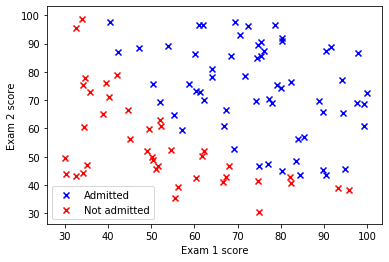

In [40]:
x_pos = np.array([X[i] for i in range(len(X)) if y[i] == 1])
x_neg = np.array([X[i] for i in range(len(X)) if y[i] == 0])
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker = "x", color = "b", label = "admitted")
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker = "x", color = "r", label = "rejected")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(['Admitted', 'Not admitted'], loc='lower left', numpoints=1)
plt.show()

In [41]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
print("value of sigmoid(0) : " + str(sigmoid(0)))
print("value of sigmoid(12) : " + str(sigmoid(12)))

value of sigmoid(0) : 0.5
value of sigmoid(12) : 0.9999938558253978


In [42]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y)*np.log(1 - predictions))
    cost = 1/m * sum(error)
    grad = 1/m * np.dot(X.transpose(), (predictions - y))
    return (cost, grad)

In [43]:
def feature_normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [44]:
m, n = X.shape[0], X.shape[1]
X, mean, std = feature_normalize(X)
X = np.append(np.ones((m, 1)), X, axis = 1)
y = y.reshape(m, 1)
initial_theta = np.zeros((n+1, 1))
cost, grad = compute_cost(X, y, initial_theta)
print("Cost with initial theta : " + str(cost))
print("grad with initial theta : " + str(grad))

Cost with initial theta : [0.69314718]
grad with initial theta : [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Implementing the gradient descent function

In [13]:
def gradient_descent(X, y, theta, alpha = 1, iterations = 600):
    m = len(y)
    J = []
    
    for i in range(iterations):
        cost, grad = compute_cost(X, y, theta)
        theta = theta - (alpha * grad)
        J.append(cost)
        if i % 50 == 0:
            print(f"Cost after iteration {i} : {cost[0]}")
    return theta, J

## The Learning Loop

In [15]:
optimized_theta, J_plot = gradient_descent(X, y, initial_theta)
print(f"Value of optimized theta : {optimized_theta}")
print(f"Optimized cost after running 600 iterations : {J_plot[-1]}")

Cost after iteration 0 : 0.693147180559946
Cost after iteration 50 : 0.2236747553563192
Cost after iteration 100 : 0.21030636199226166
Cost after iteration 150 : 0.2064071430444978
Cost after iteration 200 : 0.20487396001364275
Cost after iteration 250 : 0.20418612241597853
Cost after iteration 300 : 0.20385410511473073
Cost after iteration 350 : 0.2036864262585427
Cost after iteration 400 : 0.2035991876104249
Cost after iteration 450 : 0.20355286797339253
Cost after iteration 500 : 0.2035279213670058
Cost after iteration 550 : 0.20351434831452087
Value of optimized theta : [[1.70052917]
 [3.95453869]
 [3.68812518]]
Optimized cost after running 600 iterations : [0.20350702]


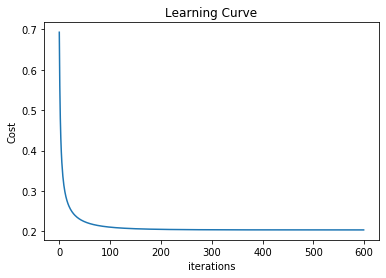

In [17]:
plt.plot(J_plot)
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.show()

##  Visualizing the decision boundary

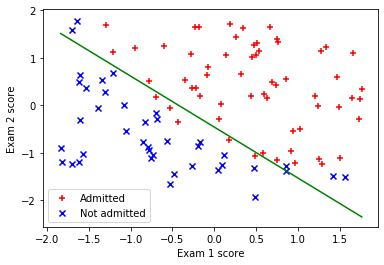

In [21]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(optimized_theta[0] + optimized_theta[1]*x_value)/optimized_theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

## Prediction Function

In [22]:
def predict(X, theta):
    predictions = np.dot(X, theta)
    return predictions > 0

In [47]:
x_test = np.array([45, 85])
x_test = (x_test - mean) / std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print(f"for a student with scores 45 and 85, we predict admission chances of {prob[0]*100}%")

for a student with scores 45 and 85, we predict admission chances of 77.37232531427982%


In [48]:
x_test = np.array([95, 85])
x_test = (x_test - mean) / std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print(f"for a student with scores 95 and 85, we predict admission chances of {prob[0]*100}%")

for a student with scores 95 and 85, we predict admission chances of 99.99892679079575%


In [51]:
x_test = np.array([55, 25])
x_test = (x_test - mean) / std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print(f"for a student with scores 55 and 25, we predict admission chances of {prob[0]*100}%")

for a student with scores 55 and 25, we predict admission chances of 0.016719619141608338%


## Accuracy

In [59]:
p=predict(X, initial_theta)
p1 = predict(X, optimized_theta)
print("Train Accuracy before learning:", sum(p==y)[0],"%")
print("Train Accuracy after learning:", sum(p1==y)[0],"%")

Train Accuracy before learning: 40 %
Train Accuracy after learning: 89 %


## Code contributed by Sammya Majumdar